In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
import numpy as np

2023-03-05 14:12:09.957865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 14:12:10.201253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 14:12:10.201296: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 14:12:11.019645: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

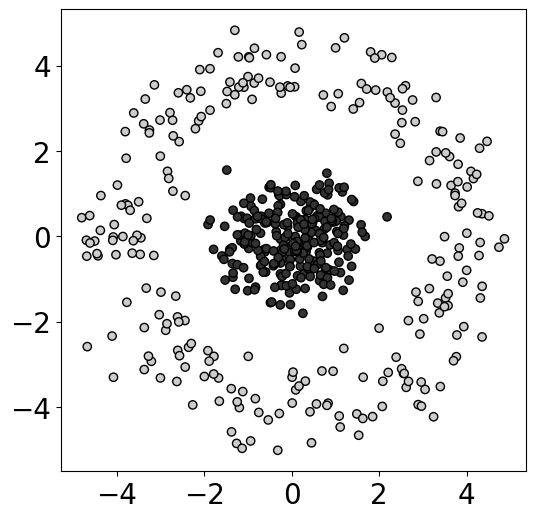

In [2]:
from sklearn.datasets import make_circles
cm_data = ListedColormap(['0.8', '0.2'])

mul_factor = 4
data, labels = make_circles(500,
                            shuffle=True,
                            noise=0.13,
                            factor=0.2,
                            random_state=13)
data = data * mul_factor

x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data,
           edgecolors='k')

plt.xticks(range(-4, 5, 2))
plt.tick_params(labelsize=20)

In [4]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,), activation=tf.nn.tanh),
    keras.layers.Dense(2, activation=tf.nn.tanh),
    keras.layers.Dense(1, activation=tf.nn.tanh)
])

2023-03-05 14:20:24.648432: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 14:20:24.648473: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 14:20:24.648498: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thomas-Lenovo-V15-G2-ALC): /proc/driver/nvidia/version does not exist
2023-03-05 14:20:24.649046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


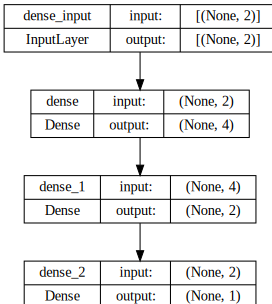

In [8]:
from IPython.display import SVG, display
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

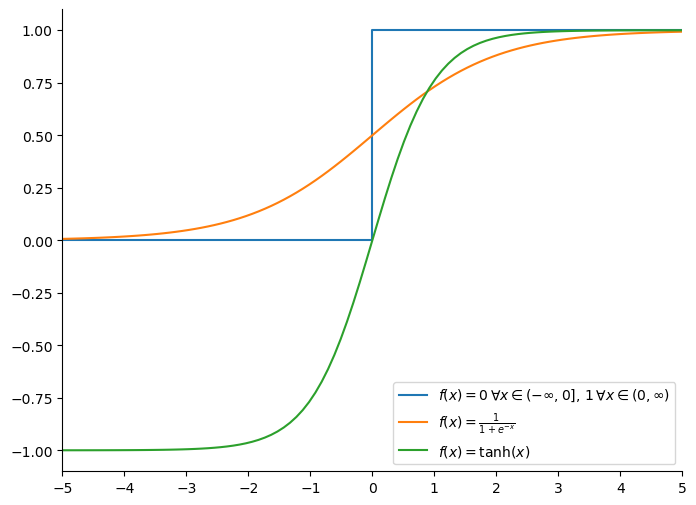

In [9]:
fig = plt.figure(figsize=(8, 6))

ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
all_x = np.append(x, -x[::-1])
all_y = np.append(y, np.ones_like(-x[::-1]))
plt.plot(all_x, all_y, label= r"$f(x) = 0\, \forall x \in (-\infty, 0],\, 1\, \forall x \in (0, \infty)$")
all_s_y = 1 / (1 + np.exp(-all_x))
all_t_y = np.tanh(all_x)
plt.plot(all_x, all_s_y, label=r"$f(x) = \frac{1}{1 + e^{-x}}$")
plt.plot(all_x, all_t_y, label=r"$f(x) = \tanh(x)$")
_ = plt.legend(loc='lower right')

In [10]:
sgd=optimizers.SGD(learning_rate=0.1)

In [11]:
model.compile(loss='mean_squared_error', optimizer=sgd, metrics='accuracy')

In [12]:
model.fit(data, labels, batch_size=10, epochs=150)

Epoch 1/150
50/50 [==============================] - 1s 2ms/step - loss: 0.2041 - accuracy: 0.7140
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.8520
Epoch 3/150
50/50 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9420
Epoch 4/150
50/50 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9920
Epoch 5/150
50/50 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9960
Epoch 6/150
50/50 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 7/150
50/50 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9980
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 9/150
50/50 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 10/150
50/50 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 11/

1263/1263 [==============================] - 1s 954us/step


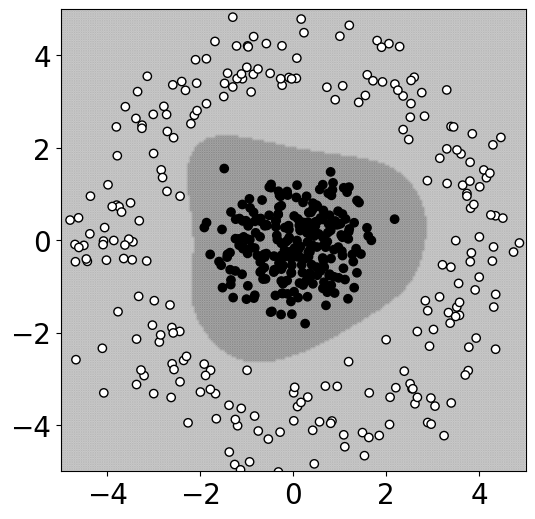

In [13]:
offset = 0.01

x_min, x_max = -5, 5 
y_min, y_max = -5, 5 

h = .05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h),
                     np.arange(y_min, y_max+h, h))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

z = predictions.reshape(xx.shape)

cm_mesh = ListedColormap(['0.7', '0.5'])

cm_data_mesh = ListedColormap(['1', '0'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.pcolormesh(xx, yy, z,
              cmap=cm_mesh,
              shading='gouraud',
              alpha=0.4)


ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data_mesh,
           linewidth=1,
           edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-4, 5, 2))
plt.tick_params(labelsize=20)